In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 3.1 The Data

In [2]:
data, flux = np.loadtxt("comp_proj_data.csv", skiprows = 1, delimiter = ',', unpack = True)


In [3]:
energy = np.arange(0, 10, 0.05)
energy_midpoints = np.arange(0.025,10,0.05)
print(energy_midpoints)
print(len(energy_midpoints))

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175
 1.225 1.275 1.325 1.375 1.425 1.475 1.525 1.575 1.625 1.675 1.725 1.775
 1.825 1.875 1.925 1.975 2.025 2.075 2.125 2.175 2.225 2.275 2.325 2.375
 2.425 2.475 2.525 2.575 2.625 2.675 2.725 2.775 2.825 2.875 2.925 2.975
 3.025 3.075 3.125 3.175 3.225 3.275 3.325 3.375 3.425 3.475 3.525 3.575
 3.625 3.675 3.725 3.775 3.825 3.875 3.925 3.975 4.025 4.075 4.125 4.175
 4.225 4.275 4.325 4.375 4.425 4.475 4.525 4.575 4.625 4.675 4.725 4.775
 4.825 4.875 4.925 4.975 5.025 5.075 5.125 5.175 5.225 5.275 5.325 5.375
 5.425 5.475 5.525 5.575 5.625 5.675 5.725 5.775 5.825 5.875 5.925 5.975
 6.025 6.075 6.125 6.175 6.225 6.275 6.325 6.375 6.425 6.475 6.525 6.575
 6.625 6.675 6.725 6.775 6.825 6.875 6.925 6.975 7.025 7.075 7.125 7.175
 7.225 7.275 7.325 7.375 7.425 7.475 7.525 7.575 7.625 7.675 7.725 7.775
 7.825 7.875 7.925 7.975 8.025 8.075 8.125 8.175 8.

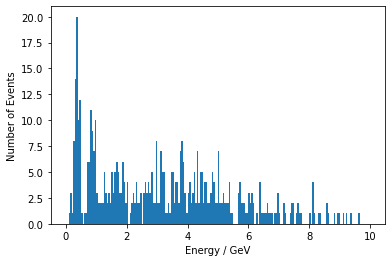

In [4]:
#%matplotlib tk 

plt.bar(energy_midpoints, data, 0.05)
plt.ylabel('Number of Events')
plt.xlabel('Energy / GeV')
plt.show()


## 3.2 Fit Function

In [5]:
def oscillation_probability(energy, theta_23 = np.pi/4, delta_m2_23 = 2.3e-3, L = 295):
  left = (np.sin(2 * theta_23)) ** 2
  right = (np.sin((1.267 * delta_m2_23 * L) / energy)) ** 2
  return 1 - (left * right)


In [6]:
def plot_oscillation_probability(energy, n = 4, delta_m = 2.4e-3):
  plt.plot(energy,oscillation_probability(energy_midpoints, theta_23= np.pi / n, delta_m2_23= delta_m))
  plt.xlabel('Probability')
  plt.ylabel('Energy / GeV')
  plt.title('Parameters theta = pi / ' + str(n) + ' and delta_m= ' + str(delta_m))

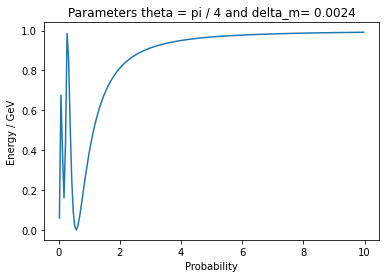

In [7]:
plot_oscillation_probability(energy_midpoints, 4, 2.4e-3)

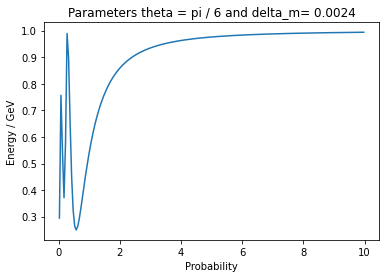

In [8]:
plot_oscillation_probability(energy_midpoints, n = 6, delta_m = 2.4e-3)

as n (pi / n) increases amplitude decreases and as delta_m decreases frequency increases

## flux x prob

In [9]:
def event_prediction(energy_midpoints, n = 4, delta_m = 2.4e-3, plot = False):
  probability_times_simulated = oscillation_probability(energy_midpoints, theta_23= np.pi * n, delta_m2_23= delta_m) * flux
  if plot == True:  
    plt.bar(energy_midpoints, probability_times_simulated, 0.05)
    plt.ylabel('Event rate prediction')
    plt.xlabel('Energy / GeV')
    plt.title('theta_n = ' + str(n) + ' delta_m = ' + str(delta_m))
    plt.show()
  return probability_times_simulated

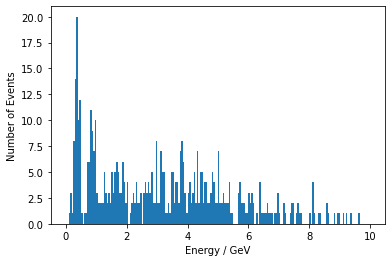

In [10]:
plt.bar(energy_midpoints, data, 0.05)
plt.ylabel('Number of Events')
plt.xlabel('Energy / GeV')
plt.show()

In [11]:
event_prediction(energy_midpoints,1/4.5,2.1e-3)

array([1.21392643e+00, 1.56379954e+00, 1.17719786e+01, 1.45747348e+00,
       2.41670371e+01, 3.51335531e+01, 2.92893701e+01, 1.76264216e+01,
       8.17888310e+00, 3.56896564e+00, 4.31494366e+00, 1.02971292e+01,
       1.88219893e+01, 2.40572768e+01, 2.43706849e+01, 2.22422013e+01,
       1.94941371e+01, 1.60962156e+01, 1.20211403e+01, 8.74889190e+00,
       6.51616923e+00, 5.27965250e+00, 4.58320694e+00, 3.90489215e+00,
       3.42423565e+00, 3.14961765e+00, 2.83978556e+00, 2.51694678e+00,
       2.39076606e+00, 2.10786583e+00, 1.99713020e+00, 1.86131029e+00,
       1.72158532e+00, 1.60401924e+00, 1.56325319e+00, 1.44484705e+00,
       1.37175403e+00, 1.31178835e+00, 1.29102501e+00, 1.20737607e+00,
       1.19259536e+00, 1.11004134e+00, 1.05441173e+00, 1.02558239e+00,
       1.02391364e+00, 9.99185934e-01, 9.59624146e-01, 9.05889181e-01,
       9.06048524e-01, 8.90016930e-01, 9.13841956e-01, 8.54773148e-01,
       8.51915660e-01, 8.66665254e-01, 8.62920226e-01, 8.24815034e-01,
      

## 3.3 Likelihood Function

In [12]:
# this can be used regardless of theta or m i think
def likelihood_function(lambda_i, observed_number_i):
  sum = 0
  for n in range(0, len(lambda_i)):
    #print(n)
    one_term = lambda_i[n] - (observed_number_i[n] * np.log(lambda_i[n])) + (np.log(np.math.factorial(int(observed_number_i[n]))))
    sum += one_term
    #print(one_term)
  return sum

In [13]:
def plot_NLL_for_theta(energy_midpoints, data, start_point=0, end_point = 2, interval = 0.01):
  n_thetas = np.arange(start_point,end_point, interval)
  NLL = []

  for n in n_thetas:
    expected_number_of_events = event_prediction(energy_midpoints,n,2.1e-3)
    NLL.append(likelihood_function(expected_number_of_events,data))

  plt.ylabel('NLL')
  plt.xlabel('n * theta')
  plt.plot(n_thetas,NLL,'x')
  #return NLL, n_thetas

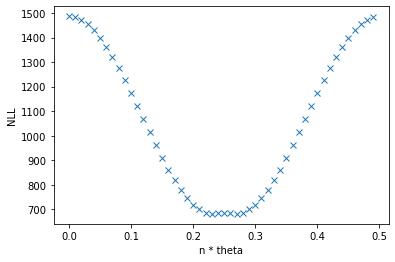

In [14]:
plot_NLL_for_theta(energy_midpoints, data, end_point= 0.5)

## parabolic minimiser

In [15]:
def get_x3(x0, x1, x2, y0, y1, y2):
  numerator = (((x2 ** 2) - (x1 ** 2)) * y0) + (((x0 ** 2) - (x2 ** 2)) * y1) + (((x1 ** 2) - x0 ** 2) * y2)
  denominator = ((x2 - x1) * y0) + ((x0 - x2) * y1) + ((x1 - x0) * y2)
  #print(numerator,denominator)
  x3 = 0.5 * numerator / denominator
  return x3

In [56]:
# x0,x1,x2 initial guesses
def parabolic_minimiser_for_theta(x0, x1, x2, m23 =  2.1e-3, min_limit = 0.001):
  change_in_x3 = 1

  while change_in_x3 > min_limit:
    #initial points
    y0 = likelihood_function(event_prediction(energy_midpoints,x0,m23),data)
    y1 = likelihood_function(event_prediction(energy_midpoints,x1,m23),data)
    y2 = likelihood_function(event_prediction(energy_midpoints,x2,m23),data)
    #print(y0,y1,y2)
    x3 = get_x3(x0, x1, x2, y0, y1, y2)
    change_in_x3 = abs(x2 - x3)
    #print(x0,x1,x2)
    #print(x3,change_in_x3)

    #moving up one
    x0 = x1
    x1 = x2
    x2 = x3

    #print(x0,x1,x2)
  return x3

In [60]:
def parabolic_minimiser_for_m23(x0, x1, x2, theta = np.pi/4, min_limit = 0.001):
  change_in_x3 = 1

  while change_in_x3 > min_limit:
    #initial points
    y0 = likelihood_function(event_prediction(energy_midpoints,theta,x0),data)
    y1 = likelihood_function(event_prediction(energy_midpoints,theta,x1),data)
    y2 = likelihood_function(event_prediction(energy_midpoints,theta,x2),data)
    #print(y0,y1,y2)
    x3 = get_x3(x0, x1, x2, y0, y1, y2)
    change_in_x3 = abs(x2 - x3)
    #print(x0,x1,x2)
    #print(x3,change_in_x3)

    #moving up one
    x0 = x1
    x1 = x2
    x2 = x3
  

    #print(x0,x1,x2)
  return x3

In [57]:
# to plot minimum point
minimum_x = parabolic_minimiser_for_theta(0.2, 0.22, 0.24)
minimum_y = likelihood_function(event_prediction(energy_midpoints,minimum_x,2.1e-3),data)

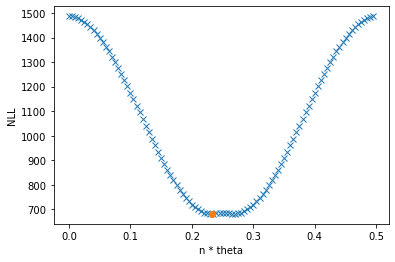

In [58]:
plot_NLL_for_theta(energy_midpoints, data, start_point= 0, end_point= 0.5, interval=0.005 )
plt.plot(minimum_x,minimum_y,'o')

# 4. two dimension

In [91]:
def plot_NLL_for_m23(energy_midpoints, data):
  m23 = np.arange(1.0e-3, 4e-3, 0.01e-3)
  NLL = []

  for n in m23:
    expected_number_of_events = event_prediction(energy_midpoints,np.pi/4,n)
    NLL.append(likelihood_function(expected_number_of_events,data))

  plt.ylabel('NLL')
  plt.xlabel('m23')
  plt.plot(m23,NLL,'x')
  #return NLL, n_thetas

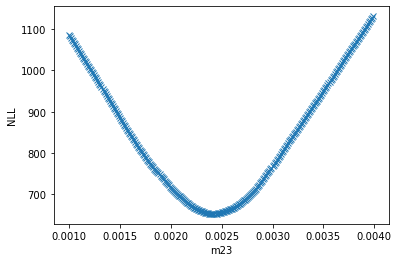

In [92]:
plot_NLL_for_m23(energy_midpoints, data)

In [75]:
minimum_x_m23 = parabolic_minimiser_for_m23(2.0e-3, 2.2e-3, 2.8e-3)
minimum_y_m23 = likelihood_function(event_prediction(energy_midpoints,np.pi/4,minimum_x_m23),data)

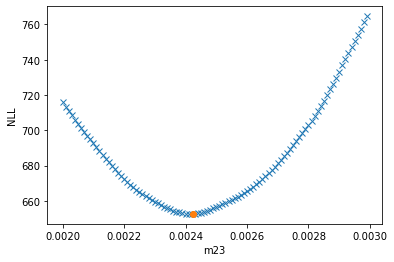

In [76]:
plot_NLL_for_m23(energy_midpoints, data)
plt.plot(minimum_x_m23,minimum_y_m23,'o')

## 2d plot

In [77]:
import seaborn as sb
from findpeaks import findpeaks

def plot_NLL_for_2d(energy_midpoints, data, start_point=0, end_point = 5, interval = 0.01):
  n_thetas = np.arange(start_point,end_point, interval)
  m23 = np.arange(2.0e-3, 3e-3, 0.01e-3)
  
  NLL = []

  for n in n_thetas:
    NLL_before = []
    for i in m23:
      expected_number_of_events = event_prediction(energy_midpoints, n, i)
      NLL_before.append(likelihood_function(expected_number_of_events,data))
    NLL.append(NLL_before)

  #print(NLL)
  #plt.ylabel('NLL')
  #plt.xlabel('n * theta')
  #sb.heatmap(NLL)
  #plt.imshow(NLL)
  #return NLL

  fp = findpeaks(method='mask')
  # Fit
  fp.fit(NLL)
  fp.plot_mesh()

[findpeaks] >Finding peaks in 2d-array using mask method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >WARNING: Conversion to gray not possible.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using the mask method with limit=0.
[findpeaks] >Fin.
[findpeaks] >Plotting 3d-mesh..


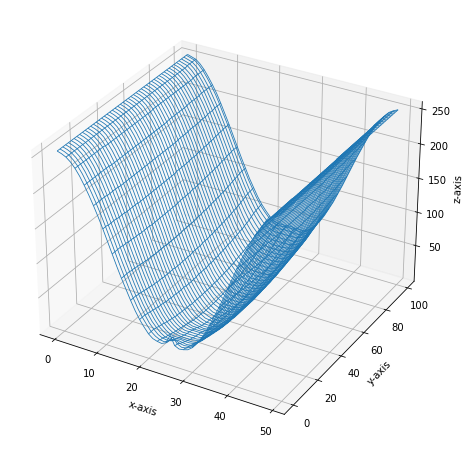

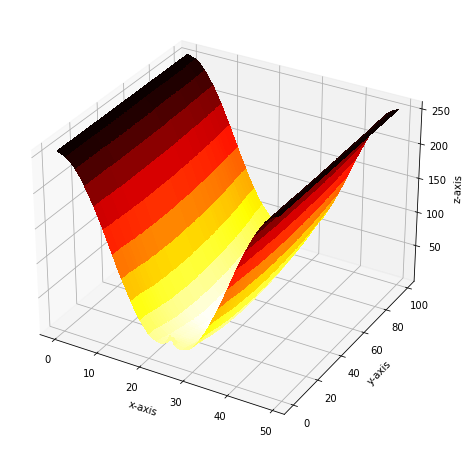

In [78]:
plot_NLL_for_2d(energy_midpoints, data, end_point= 0.5)